<a href="https://colab.research.google.com/github/sanujsriv/_topic_models/blob/FoTo/FoTo_20news_Words_CUDA_CPU_Error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !git clone https://github.com/dangpnh2/plsv_vae.git

In [ ]:
# !mv plsv_vae FoTo

In [ ]:
!wget https://www.dropbox.com/s/09y9y1h0xk3cxaj/embeddings_twentynews.pkl
!wget https://www.dropbox.com/s/ewv3vcwgll0r8a7/data_twentynews_labels.pkl
!wget https://www.dropbox.com/s/chpjn9lzr7rmn2k/fixed_data_twentynews_preprocessed.pkl

In [ ]:
!wget https://www.dropbox.com/s/8khmuj31il8zgkp/data_reuters_labels.pkl
!wget https://www.dropbox.com/s/bgc1ht0jsyjed6s/embeddings_reuters.pkl
!wget https://www.dropbox.com/s/9fk30bjzeefvhgl/data_reuters_preprocessed.pkl

In [ ]:
import os
def download_unzip_crowdgender():
  !wget https://www.dropbox.com/s/trz5uph29b0t0eg/data_crowder.zip
  os.system('unzip data_crowder.zip')

In [ ]:
download_unzip_crowdgender()

#**0. Just Run these..**

In [ ]:
#@title Stopwords
import nltk
nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#@title Imports
# from sympy.stats import RaisedCosine, density
import torch
import pandas as pd
from torch import nn
import re
from time import time
import numpy as np
import collections
import gc
import torch.optim as optim
# from utils import get_topwords, plot_fig
# from plsv_vae import PlsvVAE
# import data_preprocessing
from sklearn.feature_extraction.text import CountVectorizer
# from nltk.corpus import stopwords

In [ ]:
#@title function : load / save pickle_obj
import pickle

def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [ ]:
#@title Data Loading functions..

def new_50_twenty_news():
  embeddings = load_obj('50_embeddings_twentynews_docs')
  data_preprocessed = load_obj('50_data_twentynews_preprocessed_docs')
  data_preprocessed_labels = load_obj("50_data_twentynews_labels_docs")
  return data_preprocessed,data_preprocessed_labels,embeddings,new_50_twenty_news.__name__

def new_50_twenty_news_sent():
  embeddings = load_obj('50_embeddings_twentynews_docs')
  data_preprocessed = load_obj('50_data_twentynews_preprocessed_sent')
  data_preprocessed_labels = load_obj("50_data_twentynews_labels_sent")
  doc_sent_id = load_obj('50_doc_id_sent')
  return data_preprocessed,data_preprocessed_labels,embeddings,doc_sent_id,new_50_twenty_news_sent.__name__


def load_20News_50():
  embeddings = load_obj('50_embeddings_load_20news_docs')
  data_preprocessed = load_obj('50_docs_preprocessed')
  data_preprocessed_labels = load_obj("50_docs_labels")
  return data_preprocessed,data_preprocessed_labels,embeddings,load_20News_50.__name__

def load_20News_50_sentences():
  embeddings = load_obj('50_embeddings_load_20news_docs')
  data_preprocessed = load_obj('50_data_load_20news_sentences_preprocessed')
  data_preprocessed_labels = load_obj("50_data_load_20news_sentences_labels")
  doc_sent_id = load_obj('50_doc_id_sent_load_20news_sentences')
  return data_preprocessed,data_preprocessed_labels,embeddings,doc_sent_id,load_20News_50_sentences.__name__

def load_crowdgender():
  data_preprocessed = load_obj('data_crowdgender_preprocessed')
  data_preprocessed_labels = load_obj("data_crowdgender_labels")
  embeddings = load_obj('embeddings_crowdgender')
  return data_preprocessed,data_preprocessed_labels,embeddings,load_crowdgender.__name__


def load_reuters():
  data_preprocessed = load_obj('data_reuters_preprocessed')
  data_preprocessed_labels = load_obj("data_reuters_labels")
  embeddings = load_obj('embeddings_reuters')
  return data_preprocessed,data_preprocessed_labels,embeddings,load_reuters.__name__

def load_20News():
  embeddings = load_obj('embeddings_twentynews')
  # data_preprocessed = load_obj('data_twentynews_preprocessed')
  data_preprocessed = load_obj('fixed_data_twentynews_preprocessed')
  data_preprocessed_labels = load_obj("data_twentynews_labels")
  return data_preprocessed,data_preprocessed_labels,embeddings,load_20News.__name__

def load_20News_sentences():
  embeddings = load_obj('embeddings_twentynews_sent')
  data_preprocessed = load_obj('data_twentynews_preprocessed_sent')
  data_preprocessed_labels = load_obj("data_twentynews_labels_sent")
  doc_sent_id = load_obj('doc_id_sent_twentynews')
  return data_preprocessed,data_preprocessed_labels,embeddings,doc_sent_id,load_20News_sentences.__name__

def load_20News_reuters():
  data_preprocessed = load_obj('data_reuters_preprocessed')
  data_preprocessed_labels = load_obj("data_reuters_labels")
  embeddings = load_obj('embeddings_reuters')
  data_preprocessed.extend(load_obj('data_20News_preprocessed'))
  data_preprocessed_labels.extend(load_obj("data_20news_preprocessed_labels"))
  embeddings.update(load_obj('embeddings_20news'))
  return data_preprocessed,data_preprocessed_labels,embeddings,load_20News_reuters.__name__

def load_r52():
  data_preprocessed = load_obj('data_r52_preprocessed')
  data_preprocessed_labels = load_obj("data_r52_labels")
  embeddings = load_obj('embeddings_r52')
  return data_preprocessed,data_preprocessed_labels,embeddings,load_r52.__name__

def load_WebKb():
  data_preprocessed = load_obj('data_webkb_preprocessed')
  data_preprocessed_labels = load_obj("data_webkb_labels")
  embeddings = load_obj('embeddings_webkb')
  return data_preprocessed,data_preprocessed_labels,embeddings,load_WebKb.__name__

def load_WoS():
  data_preprocessed = load_obj('data_wos_preprocessed')
  data_preprocessed_labels = load_obj("data_wos_labels")
  embeddings = load_obj('embeddings_wos')
  return data_preprocessed,data_preprocessed_labels,embeddings,load_WoS.__name__
def load_arXiv():
  data_preprocessed = load_obj('data_arxiv_preprocessed')
  data_preprocessed_labels = load_obj("data_arxiv_labels")
  embeddings = load_obj('embeddings_arxiv')
  return data_preprocessed,data_preprocessed_labels,embeddings,load_arXiv.__name__

# Loading & Training

In [ ]:
# ##### Data loading #####
loaded_data = load_crowdgender()
##########################
data_preprocessed , data_preprocessed_labels , embeddings, name = loaded_data
print(name,len(data_preprocessed_labels),len(data_preprocessed),len(embeddings))

load_crowdgender 19804 19804 15369


In [ ]:
#@title old_COSINE_DESM
#def cosine_similarity_desm_docs(query_list, doc, embeddings):
#   doc_bar = torch.zeros(300)
#   #doc_bar_list=[]
#   sim_list = torch.zeros(len(doc))
#   index = 0
#   for d in doc:
#     doc_bar = torch.zeros(300)
#     words = d.split()
#     for word in words:
#       doc_bar.add_(torch.from_numpy(embeddings[word])/torch.norm(torch.from_numpy(embeddings[word])))
#     doc_bar = doc_bar / len(words)

#     sum = 0
#     for q in query_list:
#       sum += torch.dot(torch.from_numpy(embeddings[q]) , doc_bar)/(torch.norm(torch.from_numpy(embeddings[q]))*torch.norm(doc_bar))
#     sum = sum/len(query_list)
#     sim_list[index]=sum
#     index = index + 1
#   return sim_list

In [ ]:
def get_keywords():
  keywords = []
  keywords_arxiv = ['molecular ','stimulation','liquid','fluid']

  keywords_webkb = ['class','student','department','year']
  # keywords_r52 = ['mutual','fund','market','money']

  keywords_WoS = ['pediatric','protein','clone']
  # keywords_20News_Reuters = ['oil','price','opec','bpd','barrel','saudi','production','mln','crude']

  # keywords_reuters = ['company', 'analyst', 'offer', 'pct', 'takeover', 'merger', 'record', 'dividend', 'pay', 'stock']
  # keywords_reuters = ['stock', 'dividend', 'inc']
  keywords_reuters = ['company', 'stock', 'pct']

  keywords_20News = ['sport', 'baseball', 'game','match']
  # keywords_20News = ['looking' ,'add', 'voice' ,'input', 'capability', 'user', 'interface']

  keywords_crowdgender = ['housewife','girl','beautiful','blonde']

  keywords = keywords_crowdgender

  return keywords

In [ ]:
## DESM ##
def cosine_similarity_desm_docs(query_list, train_vec, vocab, embeddings):
  num_docs = len(train_vec)
  num_voc = len(vocab)
  sim_list = torch.zeros(num_docs)
  index = 0
  id_vocab = dict(map(reversed, vocab.items()))
  for d in range(num_docs):
    if(d%5000==0): print(d)
    doc_bar = torch.zeros(300)
    doc_length = 0
    for v in range(num_voc):
      # print(type(train_vec[d][v]))
      if(train_vec[d][v] > 0):
        doc_bar.add_(train_vec[d][v] * torch.from_numpy(embeddings[id_vocab[v]])/torch.norm(torch.from_numpy(embeddings[id_vocab[v]])))
        doc_length = doc_length + train_vec[d][v]
    doc_bar = doc_bar / doc_length
    sum = 0

    for q in query_list:
      sum += torch.dot(torch.from_numpy(embeddings[q]) , doc_bar)/(torch.norm(torch.from_numpy(embeddings[q]))*torch.norm(doc_bar))
    sum = sum/len(query_list)
    sim_list[index]=sum
    index = index + 1

  return sim_list

In [ ]:
preprossed_data = data_preprocessed
train_label = data_preprocessed_labels
vectorizer = CountVectorizer()
train_vec = vectorizer.fit_transform(preprossed_data).toarray()
vocab = vectorizer.vocabulary_
nonzeros_indexes = np.where(train_vec.any(1))[0]
train_vec_non_zeros = [train_vec[i] for i in nonzeros_indexes]
preprossed_data_non_zeros = [preprossed_data[i] for i in nonzeros_indexes]
train_label = [data_preprocessed_labels[i] for i in nonzeros_indexes]
keywords  = get_keywords()
all_rscores = cosine_similarity_desm_docs(keywords,train_vec_non_zeros,vocab, embeddings)
print(train_vec)
print(train_label)
print(vocab)

0
5000
10000
15000
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['male', 'male', 'male', 'male', 'female', 'female', 'brand', 'male', 'female', 'female', 'brand', 'brand', 'female', 'brand', 'female', 'female', 'female', 'male', 'male', 'unknown', 'female', 'female', 'male', 'male', 'female', 'brand', 'brand', 'female', 'male', 'brand', 'male', 'female', 'male', 'brand', 'male', 'brand', 'female', 'brand', 'male', 'brand', 'male', 'brand', 'male', 'male', 'male', 'female', 'male', 'female', 'brand', 'male', 'female', 'brand', 'male', 'male', 'male', 'female', 'brand', 'male', 'brand', 'brand', 'female', 'female', 'male', 'female', 'male', 'male', 'female', 'female', 'female', 'male', 'brand', 'male', 'male', 'brand', 'female', 'brand', 'female', 'male', 'male', 'female', 'female', 'brand', 'female', 'brand', 'male', 'male', 'female', 'brand', 'brand', 'female', 'brand', 'unknown', 'brand', 'male', 'brand', 'male

In [ ]:
# vectorizer = CountVectorizer()
# train_vocab = vectorizer.fit_transform(list(vocab.keys())).toarray()
# vocab_v = vectorizer.vocabulary_
# nonzeros_indexes_v = np.where(train_vocab.any(1))[0]
# train_vocab_non_zeros = [train_vocab[i] for i in nonzeros_indexes_v]
# preprossed_data_non_zeros_vocab = [list(vocab.keys())[i] for i in nonzeros_indexes_v]
# train_label_vocab = [train_label[i] for i in nonzeros_indexes_v]
# keywords  = get_keywords()
# all_rscores_vocab = cosine_similarity_desm_docs(keywords,train_vocab_non_zeros,vocab,embeddings)

0


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

tensor_train_w = torch.from_numpy(np.array(train_vec_non_zeros)).float()
# tensor_train_w = torch.from_numpy(np.array(train_vocab_non_zeros)).float()

train_label = np.asarray(train_label)
# train_label = np.asarray(train_label_vocab)

id_vocab = dict(map(reversed, vocab.items()))
# id_vocab = dict(map(reversed, vocab_v.items()))

num_coordinate = 2
bs = 256
en1_units_x = 100
en2_units_x = 100
num_input = train_vec[0].shape[0]
variance_x = 1
learning_rate = 0.002
beta1 = 0.99
beta2 = 0.999
drop_rate = 0.6
num_topic = 15
gc.collect()

20

# Score

In [ ]:
# sort,indices = torch.sort(all_rscores_vocab,descending=True)
# print('Keywords',get_keywords())
# print('Descending :',sort,'\n','indices:',indices)
# print('\n\n Top 10 Relevant Words (DESM):\n\n',"---"*40)

# for k in range(10):
#    print(k+1,') ',preprossed_data_non_zeros_vocab[indices[k].item()])
#    print(k+1,')',train_label_vocab[indices[k].item()])

In [ ]:
# torch.max(all_rscores)
top_10_docs=[]
sort,indices = torch.sort(all_rscores,descending=True)
print('Keywords',get_keywords())
print('Descending :',sort,'\n','indices:',indices)
print('\n\n Top 10 Relevant Documents (DESM):\n\n',"---"*40)

for k in range(10):
   print(k+1,') ',preprossed_data_non_zeros[indices[k].item()])
   print(k+1,')',train_label[indices[k].item()])
with open("1000.txt", "w") as output:
  for k in range(0,1000):
    output.write(str(k+1)+') '+str(preprossed_data_non_zeros[indices[k].item()])+'\n')
    output.write(str(k+1)+') '+str(sort[k].item())+'\n')
    output.write(str(k+1)+') '+str(train_label[indices[k].item()])+'\n\n')
    # print()

output.close()

Keywords ['housewife', 'girl', 'beautiful', 'blonde']
Descending : tensor([ 0.5789,  0.5721,  0.5721,  ..., -0.0401, -0.0422, -0.0427]) 
 indices: tensor([ 3410, 18680, 16444,  ...,  1202, 13706, 13368])


 Top 10 Relevant Documents (DESM):

 ------------------------------------------------------------------------------------------------------------------------
1 )  cute girl
1 ) female
2 )  girl
2 ) female
3 )  girl
3 ) male
4 )  girl
4 ) brand
5 )  girl girl
5 ) unknown
6 )  gaping beautiful sexy woman
6 ) brand
7 )  beautiful girl earth
7 ) female
8 )  blonde goddess
8 ) unknown
9 )  beautiful person good singer beautiful cute
9 ) male
10 )  shout girl hotline bling skimpy outfit girl fun friend honey
10 ) female


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
scaler = MinMaxScaler(feature_range=(0+1e-10, 0.99))
normalized_all_rscores = scaler.fit_transform(all_rscores.data.reshape(-1,1))
normalized_all_rscores=torch.tensor(normalized_all_rscores.flatten())

In [ ]:
torch.min(normalized_all_rscores)
rounded_normalized_all_rscores = torch.round(normalized_all_rscores*10)/10.0

In [ ]:
# scaler = MinMaxScaler(feature_range=(0+1e-10, 0.99))
# normalized_all_rscores_vocab = scaler.fit_transform(all_rscores_vocab.data.reshape(-1,1))
# normalized_all_rscores_vocab=torch.tensor(normalized_all_rscores_vocab.flatten())

In [ ]:
# plt.hist(normalized_all_rscores) # docs

(array([  12.,  192.,  900., 1253.,  648.,  226.,   82.,   36.,   17.,
           5.]),
 array([1.00000008e-10, 9.90000001e-02, 1.98000000e-01, 2.97000000e-01,
        3.96000000e-01, 4.95000000e-01, 5.94000000e-01, 6.93000000e-01,
        7.92000000e-01, 8.91000000e-01, 9.90000000e-01]),
 <a list of 10 Patch objects>)

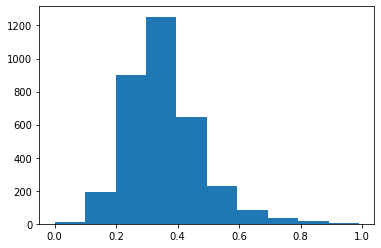

In [ ]:
# plt.hist(normalized_all_rscores_vocab)

In [ ]:
embedding_tensor_list = []
for id in range(0,len(id_vocab.keys())):
  embedding_tensor_list.append(embeddings[id_vocab[id]])
embedding_tensor =torch.from_numpy(np.array(embedding_tensor_list))

In [ ]:
embedding_tensor

tensor([[ 0.0216,  0.1021,  0.2461,  ...,  0.1973,  0.3652,  0.0137],
        [ 0.1934, -0.0581, -0.1216,  ..., -0.2617,  0.0444,  0.2715],
        [ 0.0618, -0.0713,  0.1309,  ..., -0.0659, -0.0786,  0.1235],
        ...,
        [-0.0444, -0.0918,  0.3789,  ..., -0.0688,  0.0781,  0.1553],
        [-0.0845,  0.3320, -0.0204,  ..., -0.2852,  0.2227,  0.3164],
        [ 0.0156, -0.1465,  0.0752,  ..., -0.0908, -0.0033,  0.1621]])

In [ ]:
import torch.nn
cos = nn.CosineSimilarity(dim=0, eps=1e-6)

In [ ]:
def cosine_keywords(keywords,words_tensor):
  keyword_score = []
  sum_score = []
  keyword_total_score = torch.zeros(len(vocab))
  for w in words_tensor:
    score = []
    for k in keywords:
      keyword_torch = torch.from_numpy(embeddings[k])
      score.append(cos(keyword_torch,w))
    keyword_score.append(max(score))
  return keyword_score

In [ ]:
relv_w = torch.tensor(cosine_keywords(keywords,embedding_tensor))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0+1e-10, 0.99))
normalized_relv_w = scaler.fit_transform(relv_w.data.reshape(-1,1))
normalized_relv_w=torch.tensor(normalized_relv_w.flatten())

(array([7.870e+02, 6.408e+03, 5.674e+03, 1.957e+03, 3.950e+02, 1.000e+02,
        2.800e+01, 5.000e+00, 5.000e+00, 4.000e+00]),
 array([9.99999944e-11, 9.90000001e-02, 1.98000000e-01, 2.97000000e-01,
        3.96000000e-01, 4.95000000e-01, 5.94000000e-01, 6.93000000e-01,
        7.92000000e-01, 8.91000000e-01, 9.90000000e-01]),
 <a list of 10 Patch objects>)

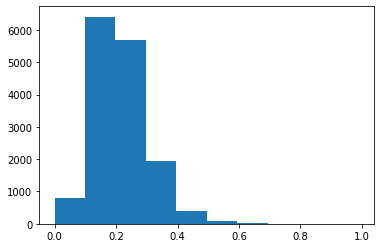

In [ ]:
plt.hist(normalized_relv_w)

In [ ]:
# Divide the score into regions (1 to 5)
# https://madebysasha.com/portfolio/visualizing-yelp-review-histories/
# Semantic Visualization of reviews with ratings

In [ ]:
# plt.hist(normalized_all_rscores_vocab)

In [ ]:
normalized_relv_w.shape

torch.Size([15363])

# Testing

In [ ]:
mull = xll = LogLL = torch.zeros(len(vocab.keys()))
LogLL

tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [ ]:
LogLL

tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [ ]:
min(mull),min(xll)

(tensor(0.), tensor(0.))

In [ ]:
s,i = torch.sort(LogLL,descending=True)
s,i

(tensor([0., 0., 0.,  ..., 0., 0., 0.]),
 tensor([2251, 2238, 2239,  ..., 1130, 1131, 1132]))

In [ ]:
mull[i[0]],xll[i[0]]

(tensor(0.), tensor(0.))

# Model

In [ ]:
import sklearn
import pickle
import torch
import sys
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from sympy.stats import RaisedCosine,density
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import torch.utils.data as data_utils
from torch.utils.data import Dataset, DataLoader, TensorDataset
from types import SimpleNamespace
from torch.nn import Parameter
torch.cuda.empty_cache()

mu_div=900.0
smoothen=1e-20
sig=100.0

gaussian_variance=torch.tensor(0.05).to(device)
pi = 3.1415927410125732

def torch_lgamma(a):
  return torch.lgamma(torch.tensor(a))

def torch_gamma(a):
  return torch.exp(torch.lgamma(torch.tensor(a)))

def gaussian_dist(x,mu,variance):
  exp_term = torch.exp( -0.5 * ((x-mu)/variance)**2 )
  var_term = 1.0 / (variance * (2*pi)**0.5)
  ret = torch.mul(var_term,exp_term)
  ret = torch.log(ret)
  return ret

def NewBeta_dist(x,mu,phi_beta,smoothen):
  First = torch_lgamma(phi_beta) - (torch_lgamma(phi_beta * mu) + torch_lgamma(phi_beta * (1-mu)))
  Second_1 = (mu*phi_beta-1) * torch.log(x+smoothen)
  Second_2 = ( (1-mu)*phi_beta-1 )* torch.log(1-x+smoothen)
  Second = Second_1 + Second_2
  # print(First)
  # print(Second_1)
  # print(Second_2)
  ret = First + Second
  return ret

# def NewBeta_dist(x,mu,phi_beta,smoothen):
#   First = torch_gamma(phi_beta) / (torch_gamma(phi_beta * mu) * torch_gamma(phi_beta * (1-mu)) )
#   Second_1 = torch.pow(x,(mu * phi_beta - 1))
#   Second_2 = torch.pow((1-x),((1-mu)*phi_beta -1))
#   # # print(First)
#   # # print(Second_1)
#   # # print(Second_2)
#   Second = (Second_1) * (Second_2)
#   return ((First) * (Second))

def LogL_Beta(relv_w,R_w):
  LogL = NewBeta_dist(relv_w,R_w,sig,smoothen)
  return LogL.sum()

def LogL_NewBeta(x,relevant_scores):
  x_norm = torch.norm(x,dim=-1)
  mu = torch.exp(-0.5 * (torch.pow(x_norm,2))/mu_div)
  # LogL = torch.log(NewBeta_dist(relevant_scores,mu,sig,smoothen)+smoothen)
  LogL = NewBeta_dist(relevant_scores,mu,sig,smoothen)
  return LogL.sum()

def gaussian(alpha):
    # phi = torch.exp(-5*alpha)
    phi = -0.5*alpha
    return phi

def inverse_multi_quadric(alpha):
    phi = -0.5*torch.log(torch.ones_like(alpha) + alpha)
    return phi

def inverse_quadratic(alpha):
    # phi = torch.ones_like(alpha) / (torch.ones_like(alpha) + alpha)
    phi = -torch.log(torch.ones_like(alpha) + alpha)
    return phi

class PlsvVAE(nn.Module):
    def __init__(self, num_input, en1_units_x, en2_units_x, num_coordinate, num_topic, drop_rate, variance_x, bs, distance="gaussian"):
        super(PlsvVAE, self).__init__()
        self.num_input, self.num_coordinate, self.num_topic, self.variance_x, self.bs\
            = num_input, num_coordinate, num_topic, variance_x, bs

        # encoder
        self.en1_fc     = nn.Linear(num_input, en1_units_x)             # V -> 100 #nxV->(vxh1)->nxh1;
        self.en2_fc     = nn.Linear(en1_units_x, en2_units_x)             # 100  -> 100
        self.en2_drop   = nn.Dropout(drop_rate)
        self.mean_fc    = nn.Linear(en2_units_x, num_coordinate)        # 100  -> 2
        self.mean_bn    = nn.BatchNorm1d(num_coordinate)              # bn for mean
        self.logvar_fc  = nn.Linear(en2_units_x, num_coordinate)        # 100  -> 2
        self.logvar_bn  = nn.BatchNorm1d(num_coordinate)              # bn for logvar


        # RBF
        self.in_features = self.num_coordinate
        self.out_features = self.num_topic
        self.centres = nn.Parameter(torch.Tensor(self.out_features, self.in_features))


        self.query_center = nn.Parameter(torch.zeros(2,1))

        if distance=="gaussian":
            self.basis_func = gaussian
        if distance=="inverse_quadratic":
            self.basis_func = inverse_quadratic
        if distance=="inverse_multi_quadric":
            self.basis_func = inverse_multi_quadric
        self.init_parameters()


        # decoder layer
        self.decoder    = nn.Linear(self.num_topic, self.num_input)             # 50   -> 1995
        self.decoder_bn = nn.BatchNorm1d(self.num_topic)                      # bn for decoder

        # decoder document
        self.decoder_phi_bn = nn.BatchNorm1d(num_coordinate)                      # bn for decoder
        self.decoder_x_bn = nn.BatchNorm1d(num_coordinate)

        # prior mean and variance as constant buffers
        prior_mean   = torch.Tensor(1, num_coordinate).fill_(0)
        prior_var    = torch.Tensor(1, num_coordinate).fill_(variance_x)
        self.prior_mean = nn.Parameter(prior_mean, requires_grad=False)
        self.prior_var  = nn.Parameter(prior_var, requires_grad=False)
        self.prior_logvar = nn.Parameter(prior_var.log(), requires_grad=False)


    def init_parameters(self):
        nn.init.normal_(self.centres, 0, 0.01)

    def encode(self, input_):
        N, *_ = input_.size()
        # compute posterior
        en1 = F.softplus(self.en1_fc(input_))                           # en1_fc   output
        en2 = F.softplus(self.en2_fc(en1))                              # encoder2 output
        en2 = self.en2_drop(en2)
        posterior_mean   = self.mean_bn  (self.mean_fc  (en2))          # posterior mean
        posterior_logvar = self.logvar_bn(self.logvar_fc(en2))          # posterior log variance
        posterior_var    = posterior_logvar.exp()

        return en2, posterior_mean, posterior_logvar, posterior_var

    def take_sample(self, input_, posterior_mean, posterior_var, prior_var):
        # take sample
        eps = input_.data.new().resize_as_(posterior_mean.data).normal_(std=1) # noise
        # N x X
        z = posterior_mean + posterior_var.sqrt() * eps                   # reparameterization

        return z

    def decode(self, z):
        # decode

        N, *_ = z.size()
        zx = self.decoder_x_bn(z).view(N, 1, self.num_coordinate) # Nx1xX
        size = (N, self.out_features, self.in_features) # N,K,2
        x = zx.expand(size)
        c = self.decoder_phi_bn(self.centres).unsqueeze(0).expand(size)
        d = (x-c).pow(2).sum(-1)
        distances = self.basis_func(d) #NxK
        zx_phi = torch.exp(distances - torch.logsumexp(distances, dim=-1, keepdim=True)) # N x T
        recon_v = torch.mm(zx_phi, F.softmax(self.decoder_bn(self.decoder.weight).transpose(1,0), dim=-1))

##############################################################################################################

        # P(w | z)
        W_z = F.softmax(self.decoder_bn(self.decoder.weight),dim=-1) # V x T

        # P(z)
        P_z = zx_phi.sum(0) / N  # T

        # P(z | w)
        Z_w = W_z * P_z # V x T
        Z_w = Z_w/Z_w.sum(dim=-1).unsqueeze(-1).expand(Z_w.shape)

        c_norm = self.decoder_phi_bn(self.centres).pow(2).sum(-1)

        # r = c_norm ** 0.5

        # D=38.0
        # c=0.05
        # a=5.0

        # R_phi = (1-c) / (1 + torch.exp(a * (2.0* r / D ) - 1.0 )) + c


        R_phi = torch.exp(-0.5 * c_norm/mu_div) # T

        R_w = (Z_w * R_phi).sum(-1)

###############################################################################################################

        return recon_v, zx, zx_phi, d, c,R_w

    def forward(self, input_, relevant_scores,relv_w, compute_loss=False):
        en2, posterior_mean, posterior_logvar, posterior_var = self.encode(input_)
        z = self.take_sample(input_, posterior_mean, posterior_var, self.variance_x)

        # decode
        recon_v, zx, zx_phi,d,c,R_w= self.decode(z)

        if compute_loss:
            return recon_v, self.loss(input_, recon_v, zx_phi, posterior_mean, posterior_logvar, posterior_var, d, c, relevant_scores, zx,R_w,relv_w)
        else:
            return z, recon_v, zx, zx_phi


    def loss(self, input_, recon_v, zx_phi, posterior_mean, posterior_logvar, posterior_var, d, c, relevant_scores, zx,R_w,relv_w,avg=True):
        N = posterior_mean.shape[0]
        NL = - (input_ * (recon_v+1e-10).log()).sum(-1)

        prior_mean   = self.prior_mean.expand_as(posterior_mean)
        prior_var    = self.prior_var.expand_as(posterior_mean)
        prior_logvar = self.prior_logvar.expand_as(posterior_mean)

        var_division    = posterior_var  / prior_var #Nx2
        diff            = posterior_mean - prior_mean
        diff_term       = diff * diff / prior_var
        logvar_division = prior_logvar - posterior_logvar

        xKLD = 0.5 * ( (var_division + diff_term + logvar_division).sum(-1) - self.num_coordinate)
        xKLD_mean = xKLD.mean()
        # return_xKLD = xKLD.mean(0)
        # KL = return_xKLD

        NL_mean = NL.mean()

        LogL = NewBeta_dist(relv_w,R_w,sig,smoothen)
        # LogL = gaussian_dist(relv_w,R_w,gaussian_variance)

        # NegativeLogL_RScore = - LogL.nansum()
        NegativeLogL_RScore = - LogL.sum()

        # loss = NL.sum() + xKLD + NegativeLogL_RScore
        loss = NL_mean + xKLD_mean + NegativeLogL_RScore/N

        return loss, NL_mean, xKLD_mean, NegativeLogL_RScore/N

In [ ]:
torch.manual_seed(1234)
all_indices = torch.randperm(tensor_train_w.size(0)).split(bs)

In [ ]:
all_indices

In [ ]:
input_w = tensor_train_w[all_indices[0]]
input_w.shape

torch.Size([256, 15363])

In [ ]:
normalized_relv_w

tensor([0.0911, 0.1012, 0.0850,  ..., 0.1976, 0.2792, 0.2770],
       dtype=torch.float64)

In [ ]:
model = PlsvVAE(num_input, en1_units_x, en2_units_x, num_coordinate, num_topic, drop_rate, variance_x, bs, "inverse_quadratic")
model.to(device)
optimizer = optim.Adam(model.parameters(), learning_rate, betas=(beta1, beta2))
epochs = 1000
phi_arr = []
beta_arr = []
x_arr = []
recon_arr = []
neg_log_rscore_arr=[]
list_d = []
total_loss=[]

# torch.manual_seed(1234)
all_indices = torch.randperm(tensor_train_w.size(0)).split(bs)
# torch.manual_seed(5678)

for epoch in range(epochs):
    loss_u_epoch = 0.0
    loss_xkl_epoch = 0.0
    loss_betakl_epoch = 0.0
    loss_phikl_epoch = 0.0
    loss_KLD = 0.0
    loss_phi_epoch = 0.0
    recon_ep = 0.0
    loss_epoch = 0.0
    neg_log_rscore_ep = 0.0
    model.train()
    d_temp = []
    count = 0

    for batch_ndx in all_indices:

        input_w = tensor_train_w[batch_ndx].to(device)
        labels = train_label[batch_ndx]
        relevant_scores = rounded_normalized_all_rscores[batch_ndx].unsqueeze(-1).to(device)
        recon_v, (loss, loss_u, xkl_loss, neg_log_rscore) = model(input_w, relevant_scores,normalized_relv_w,compute_loss=True)

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()             # backpror.step()            # update parameters
        loss_epoch += loss.item()
        loss_u_epoch += loss_u.item()
        loss_xkl_epoch += xkl_loss.item()
        # loss_KLD += kl.item() #/ len(tensor_train_w))
        # recon_ep += recon_v.mean().item()
        neg_log_rscore_ep += neg_log_rscore.item()
        count = count + 1;
    total_loss.append(loss_epoch)
    x_arr.append(loss_xkl_epoch)
    recon_arr.append(loss_u_epoch)
    neg_log_rscore_arr.append(neg_log_rscore_ep)

    if epoch % 10 == 0:
        print('Epoch {}, loss={}'.format(epoch, loss_epoch))
        print('recon_loss={}, KLD= {}, neg_loss = {}'.format(loss_u_epoch, loss_xkl_epoch, neg_log_rscore_ep))
        gc.collect()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


RuntimeError: ignored

In [ ]:
import plotly.graph_objects as go
def plot_loss(y,name):
  figure = go.Figure()
  figure.add_trace(go.Scatter(x=[i for i in range(1,epochs+1)], y=y,mode='lines',name=name))
  figure.show(renderer='colab')
# plot_loss(x_arr,'KLD')
# plot_loss(recon_arr,'Recon_loss')
# plot_loss(neg_log_rscore_arr,'RScore')

In [ ]:
plot_loss(neg_log_rscore_arr,"neg")

In [ ]:
plot_loss(recon_arr,'Recon_loss')

In [ ]:
plot_loss(total_loss,'Total Loss')

In [ ]:
def get_topwords(beta, id_vocab):
    topic_indx = 0
    topwords_topic = []
    for i in range(len(beta)):
        topwords_topic.append( str(topic_indx)+": "+ " ".join([id_vocab[j] for j in beta[i].argsort()[:-10 - 1:-1]]))
        topic_indx+=1
    return topwords_topic

In [ ]:
tensor_train_w.sum(-1)

In [ ]:
model.eval()
x_list = []
phi_list = []
beta_list = []
labels_list = []
doc_ids = []
zx_phi_list=[]

with torch.no_grad():
    for batch_ndx in all_indices:
        input_w = tensor_train_w[batch_ndx].to(device)
        labels = train_label[batch_ndx]

        # relevant_scores = all_rscores[batch_ndx].to(device).unsqueeze(-1)
        relevant_scores = rounded_normalized_all_rscores[batch_ndx].to(device).unsqueeze(-1)

        labels_list.extend(labels)
        z, recon_v, zx, zx_phi = model(input_w, relevant_scores,normalized_relv_w,compute_loss=False)

        zx = zx.view(-1, num_coordinate).data.detach().cpu().numpy()
        zx_phi = zx_phi.view(-1, num_topic).data.detach().cpu().numpy()
        zx_phi_list.extend(zx_phi)
        x_list.extend(zx)
        doc_ids.extend(batch_ndx)

    x_list = np.array(x_list)
    # zx_phi_list =  np.array(zx_phi_list)

    beta = model.decoder.weight.data.cpu().numpy().T#
    zphi = model.decoder_phi_bn(model.centres).data.cpu().numpy()
    query_center = model.query_center.data.cpu().numpy()

    print("---"*10)
    topword_topics = get_topwords(beta, id_vocab)
    topword_topics_list=[]
    for topwords in topword_topics:
        topword_topics_list.append(topwords.split())
        print(topwords)
    print("---"*10)

In [ ]:
def get_Z(X,Y):
  norms = torch.zeros(X.shape)
  Z = torch.zeros(X.shape)

  # D=38.0
  # c=0.05
  # a=5.0

  # R_phi = (1-c) / (1 + torch.exp(a * (2.0* r / D ) - 1.0 )) + c

  for i in range(X.shape[0]):
    for j in range(X.shape[0]):
      v = torch.tensor([X[i][j],Y[i][j]])
      norms[i][j] = torch.norm(v)

      # Z[i][j] = (1-c) / (1 + torch.exp(a * (2.0* norms[i][j] / D ) - 1.0 )) + c

      Z[i][j]=torch.exp(-0.5 * (torch.pow(norms[i][j],2))/mu_div)
  return Z

In [ ]:
get_keywords()

In [ ]:
def get_Contour(ax,x_list):
  xlist = np.linspace(-50, 50, 200)
  ylist = np.linspace(-50, 50, 200)
  X, Y = np.meshgrid(xlist, ylist)
  Z = get_Z(X,Y)
  levels = np.arange(0,1,0.1)
  cp = ax.contour(X, Y, Z, levels=levels)
  ax.clabel(cp, inline=1, fontsize=10)

In [ ]:
import collections
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, show
import seaborn as sb

def plot_fig(zx, labels_list, zphi, query_center):
    lim = (-50,50)
    labels = []
    for i in range(len(labels_list)):
        labels.append('C'+str(labels_list[i]))
    fig, ax = plt.subplots( figsize=(20, 20))
    sb.scatterplot(ax=ax,x=zx[:,0],y=zx[:,1],hue=labels_list,alpha=0.8,palette='deep')
    ax.set(ylim=lim)
    ax.set(xlim=lim)
    get_Contour(ax,zx)

    # ax.scatter(zx[:,0], zx[:,1], alpha=0.8, c=labels, facecolors='none', s=8)
    # for d in range(len(labels_list)):
    #  score = rounded_normalized_all_rscores[doc_ids[d]].item()
    #  if(score>0.7 and score<0.9):
    #   ax.text(zx[d,0],zx[d,1], str(round(score, 3) ) )

    ax.text(query_center[0],query_center[1], 'X' ,c='black')
    # ax.text(0,0, 'X' ,c='black')
    ax.scatter(zphi[:, 0], zphi[:, 1], alpha=1.0,  edgecolors='black', facecolors='none', s=30)

    for indx, topic in enumerate(zphi):
        ax.text(zphi[indx, 0], zphi[indx, 1], 'topic'+str(indx))

In [ ]:
plot_fig(x_list, labels_list, zphi,query_center)

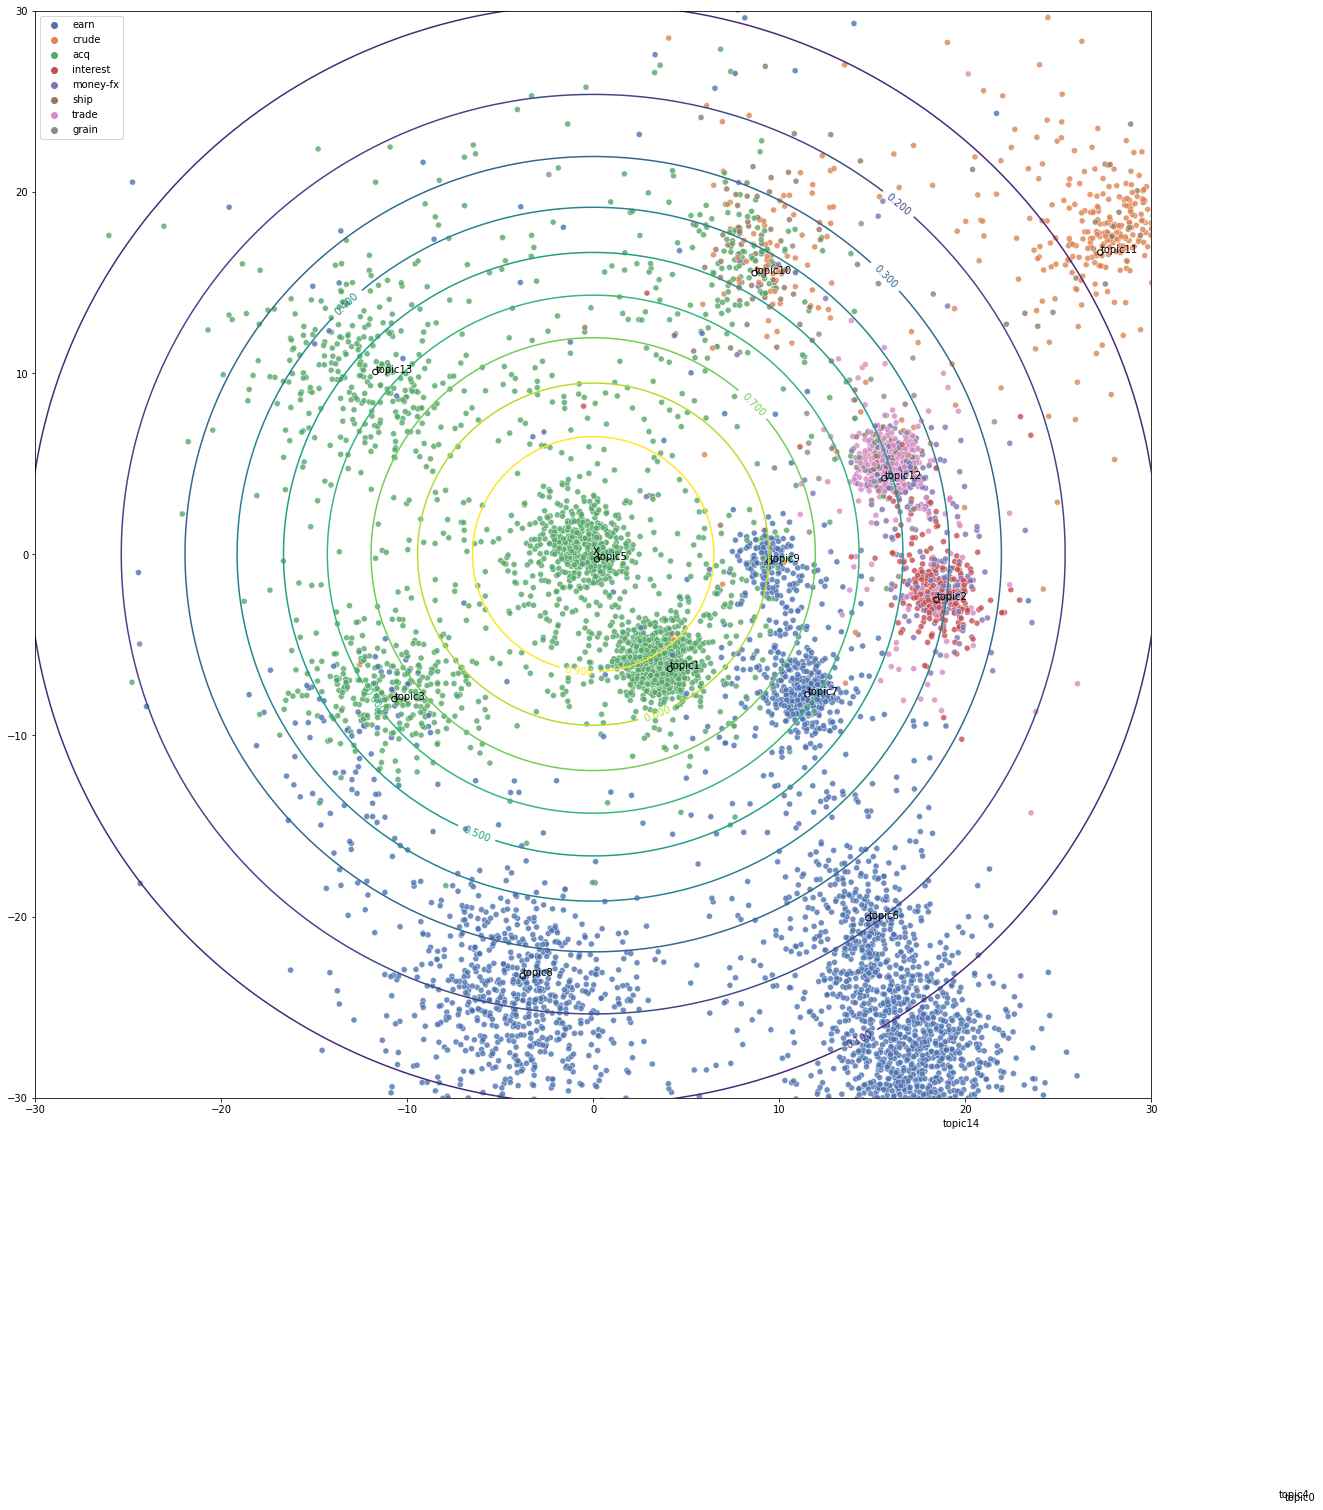

In [ ]:
plot_fig(x_list, labels_list, zphi,query_center)

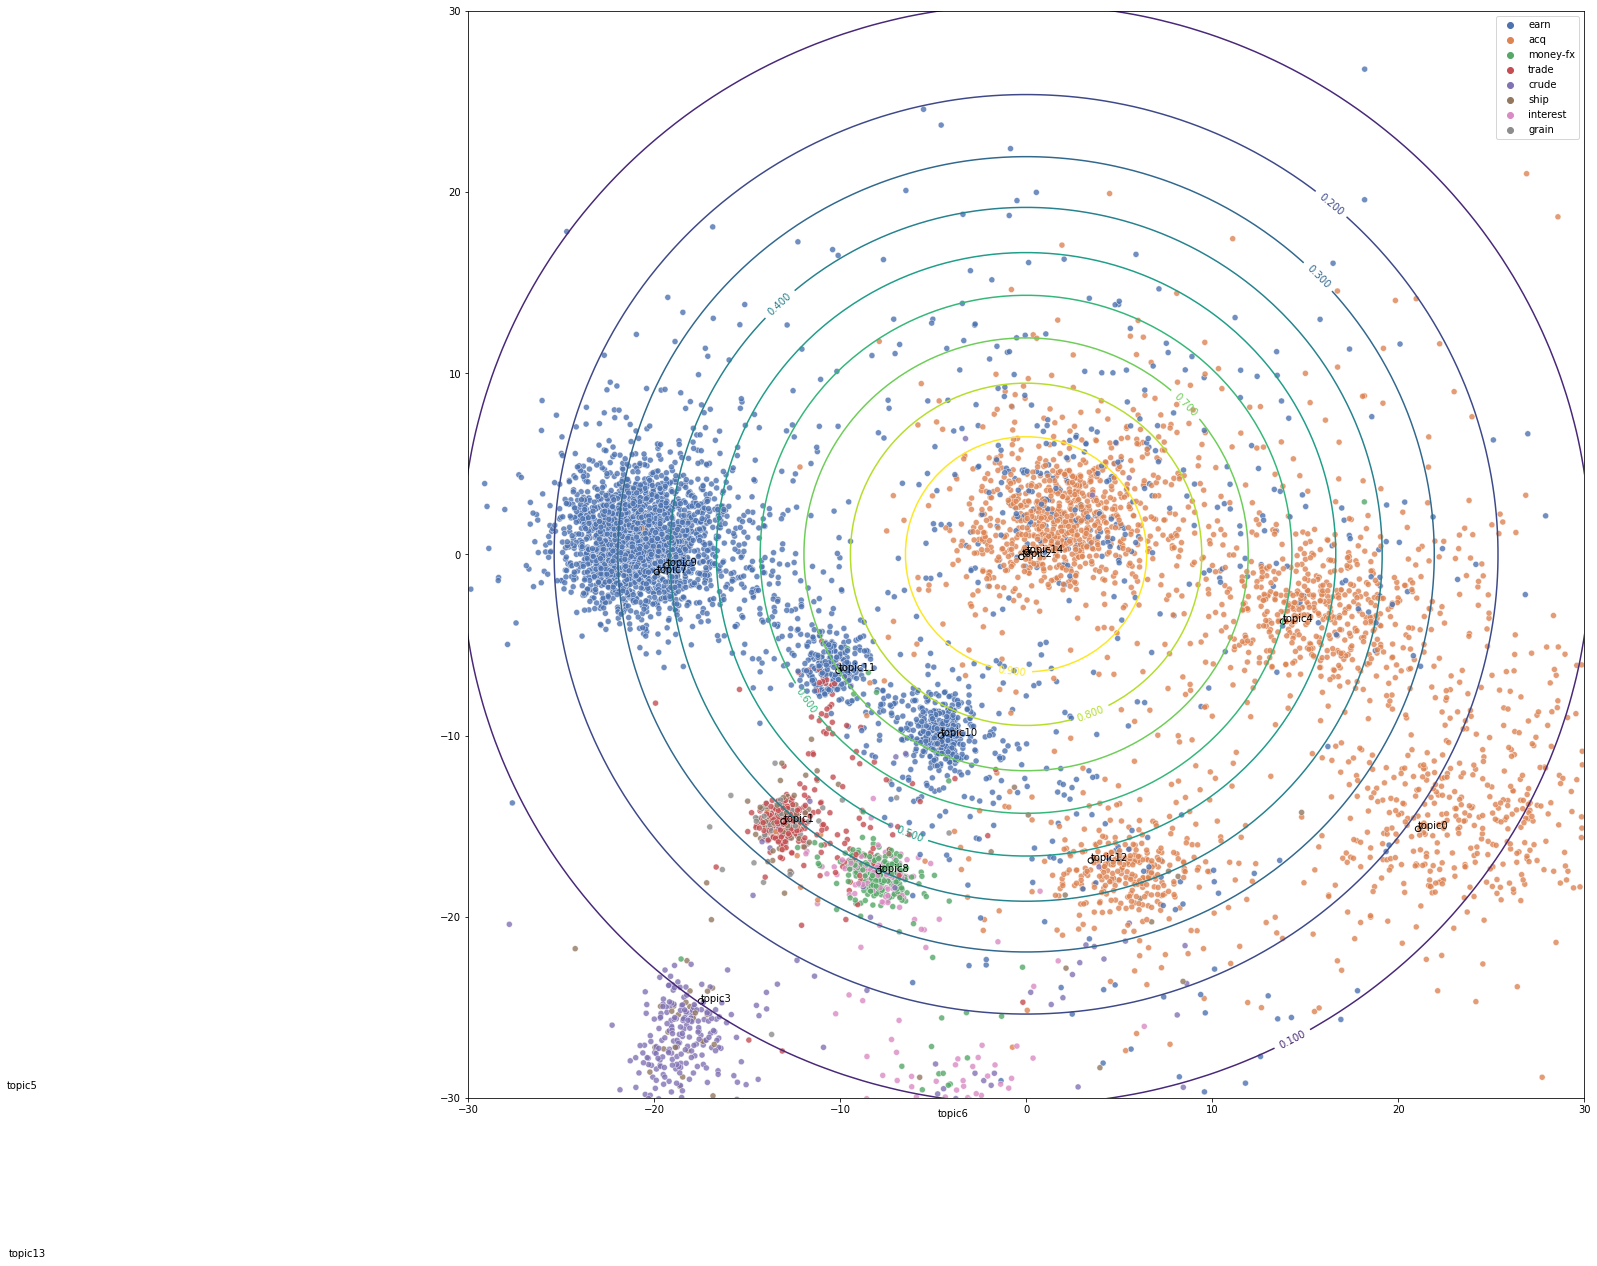

In [ ]:
plot_fig(x_list, labels_list, zphi,query_center)

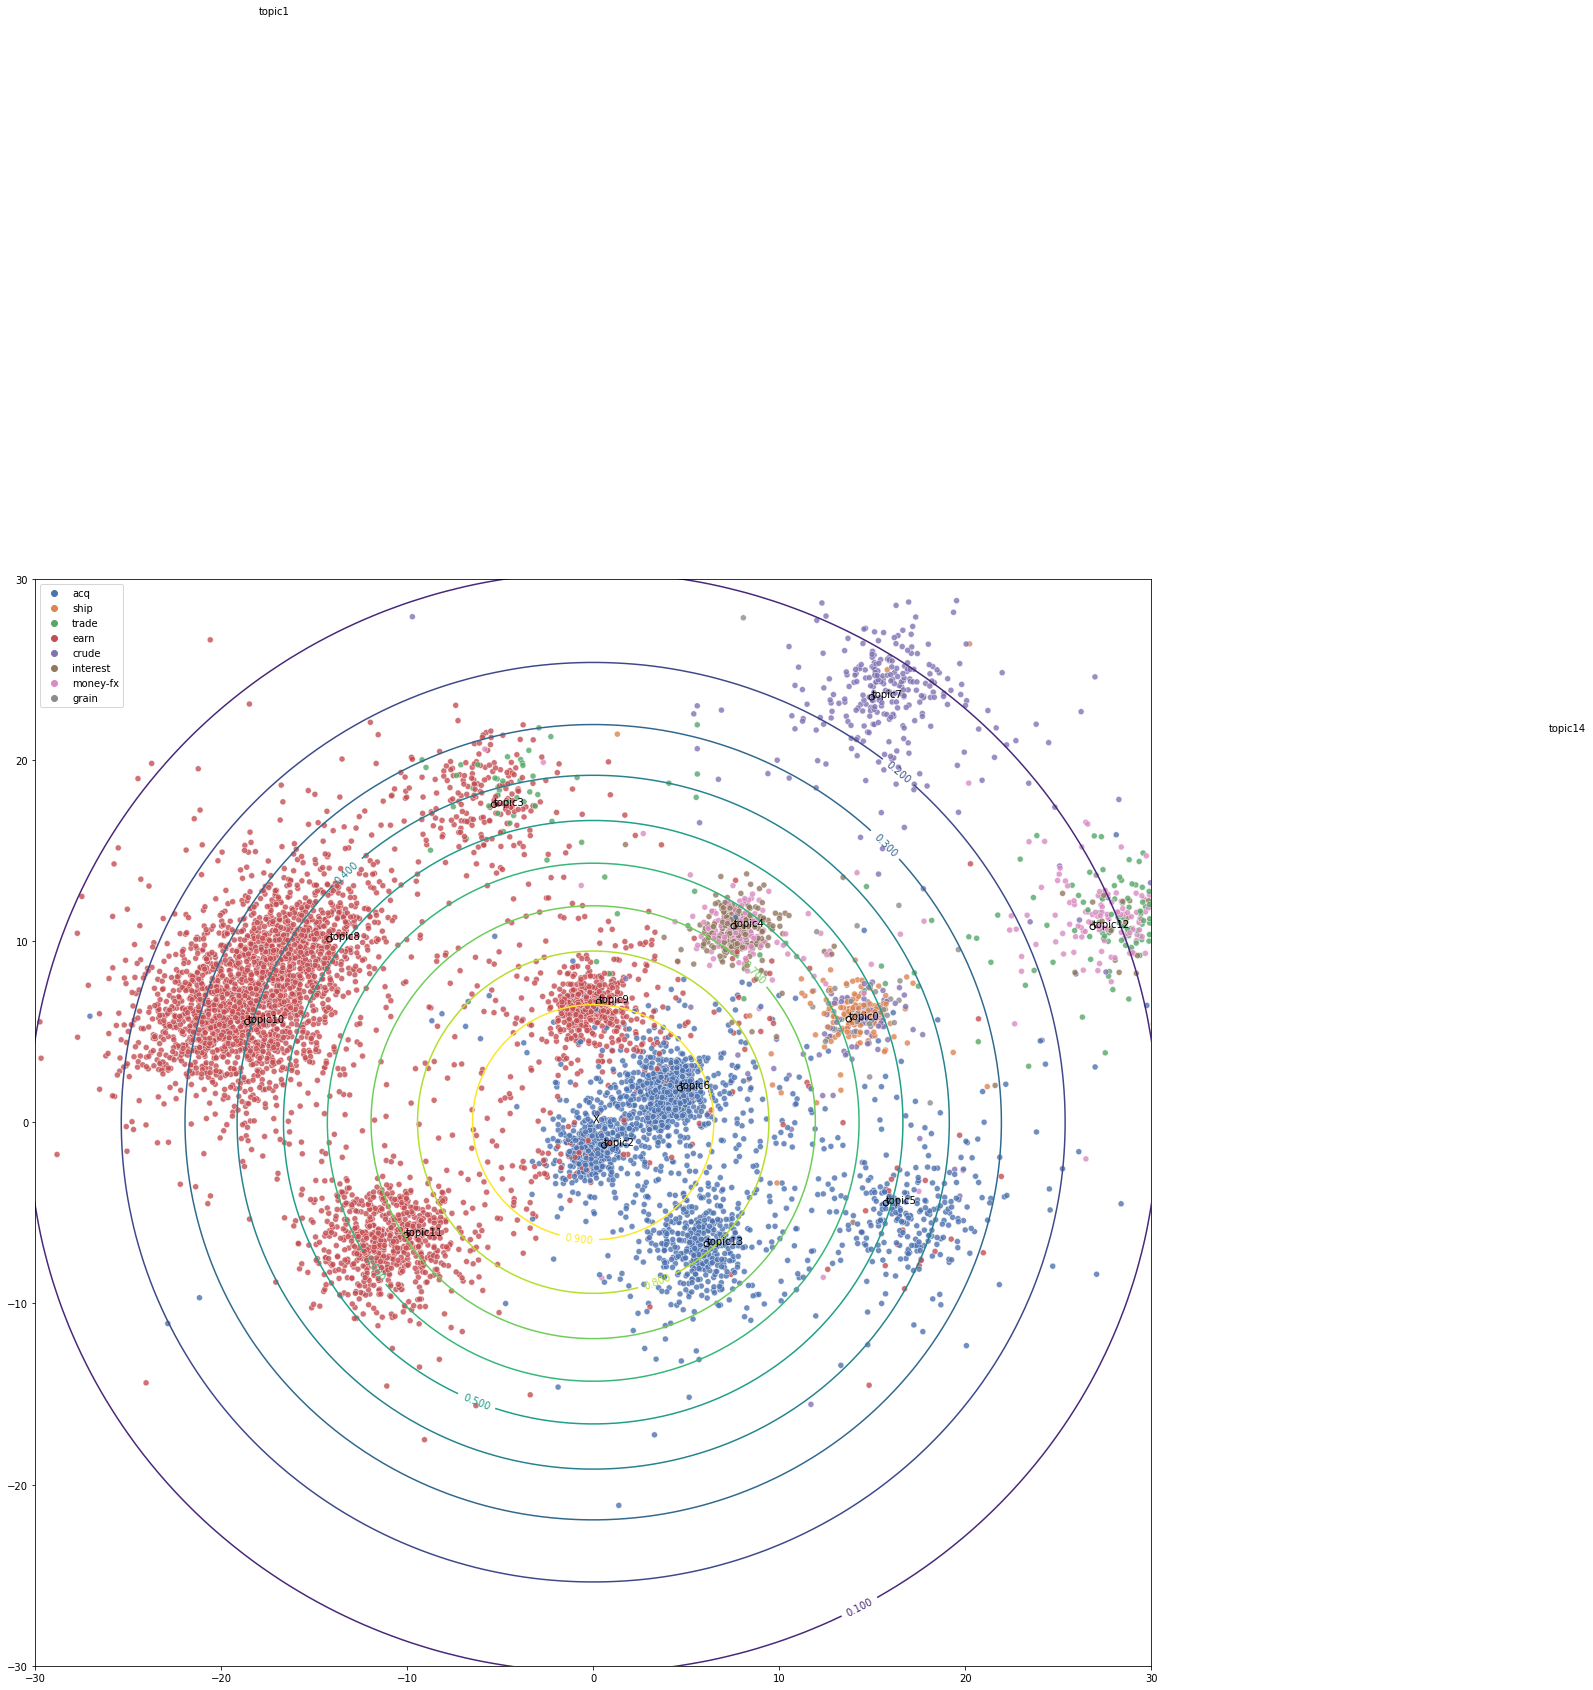

In [ ]:
plot_fig(x_list, labels_list, zphi,query_center)

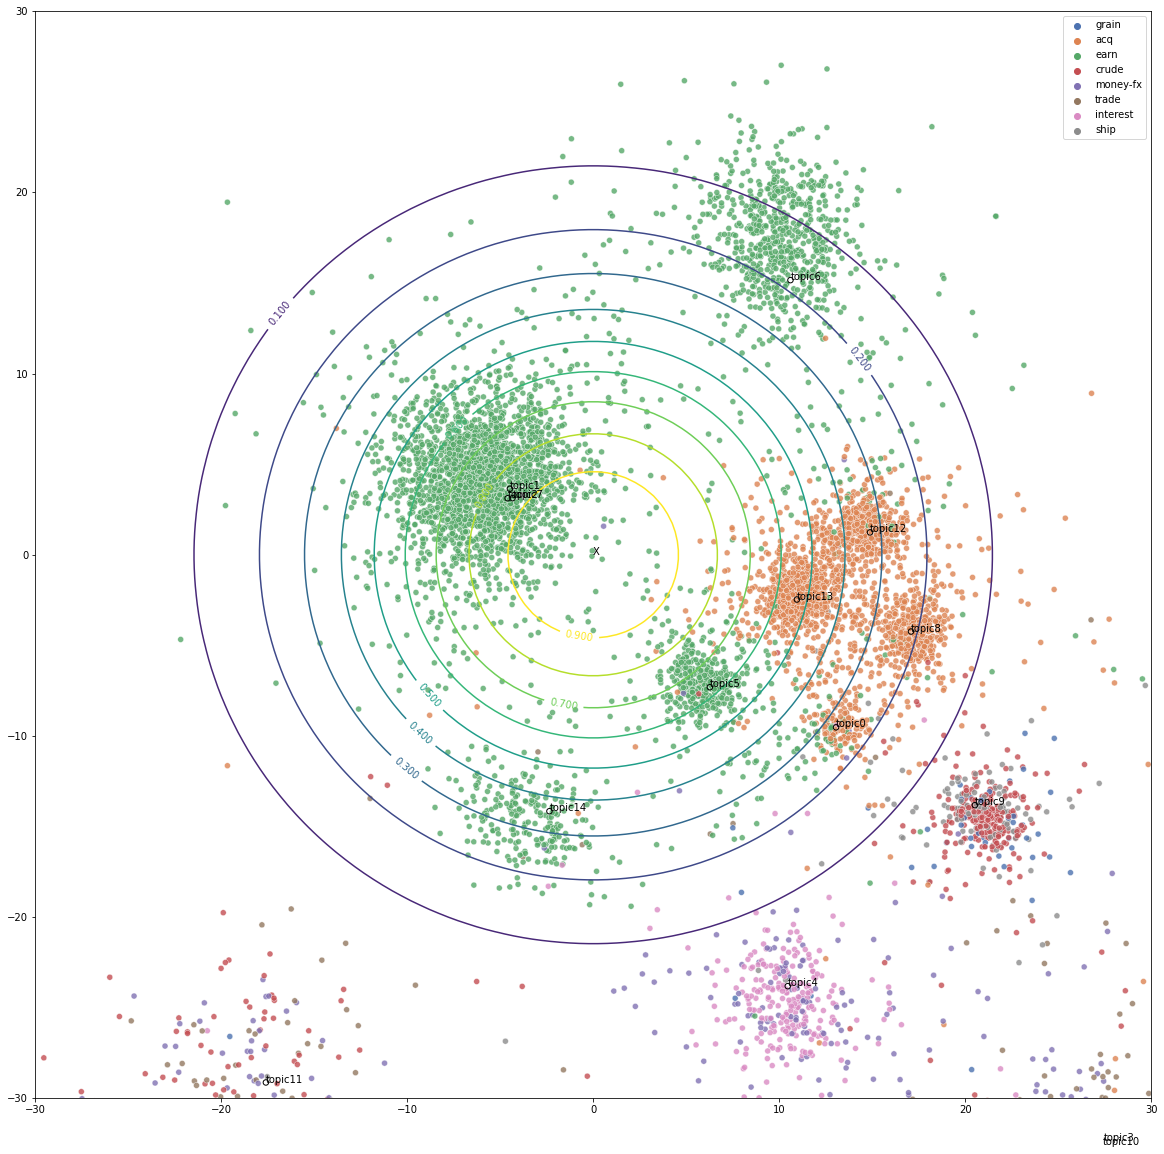

In [ ]:
plot_fig(x_list, labels_list, zphi,query_center)

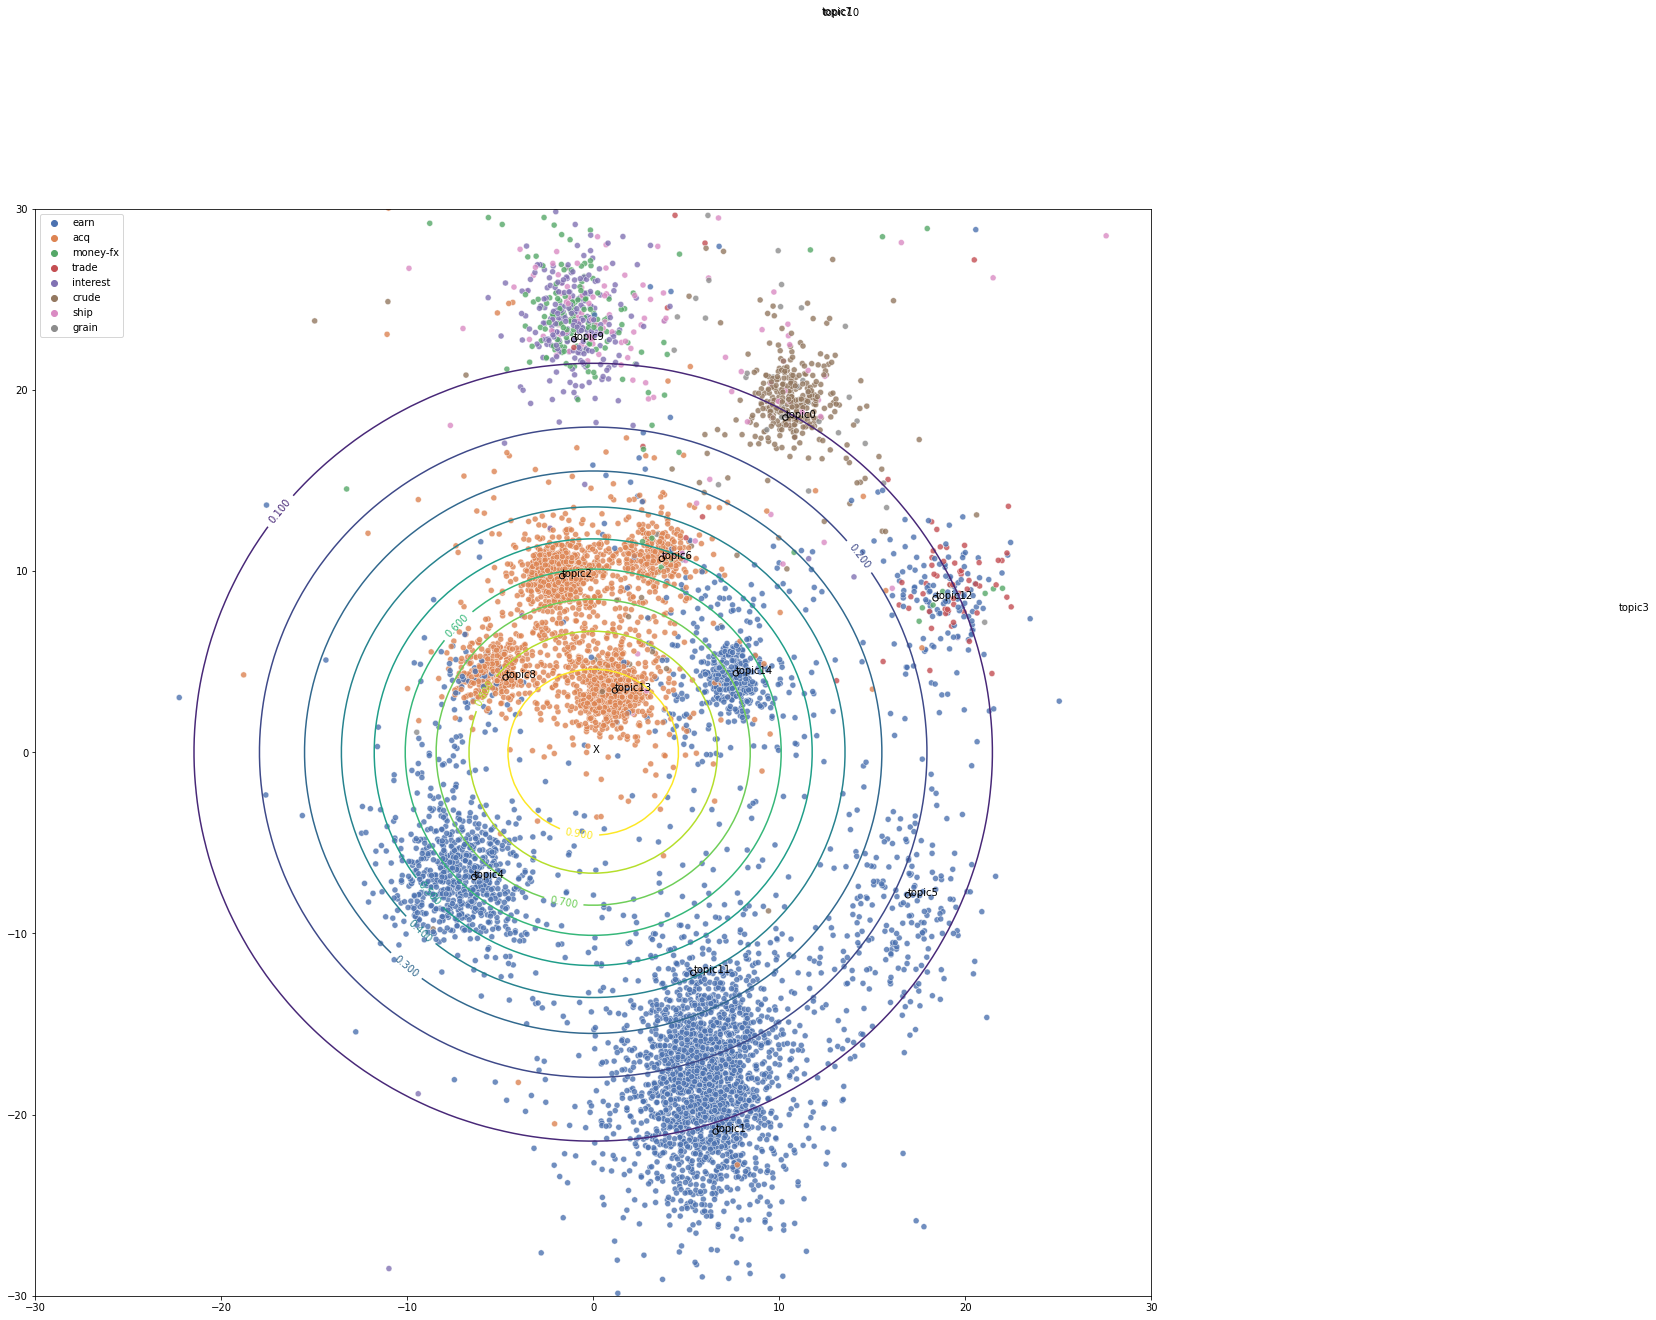

In [ ]:
plot_fig(x_list, labels_list, zphi,query_center)

In [ ]:
------------------------------
0: oil said price crude opec barrel bpd production mln dlrs
1: mln ct net shr loss dlrs qtr rev profit avg
2: said share offer pct dlrs group company stock inc stake
3: dlrs ended reflect data great food related principle robert obligation
4: ct april record dividend pay prior div march qtly may
5: mln billion profit net tax stg year loan note asset
6: said company would pct analyst bank share new market ltd
7: trade japanese country minister year united economic currency would export
8: said share stock company dlrs common shareholder bank mln inc
9: bank rate pct said market stg money day interest today
10: said japan state market would agreement last foreign tariff government
11: mln ct net loss dlrs shr qtr rev profit year
12: billion year pct said mln profit bank mark dlrs rose
13: said inc corp dlrs mln company sale unit co sell
14: dlrs said year mln quarter company earnings share first loss
------------------------------



#WordCloud



In [ ]:
!pip install wordcloud

In [ ]:
word_list=data_20news_preprocessed[j].split()
print(word_list)
flatten_all_words

In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt

comment_words = ''
topic_topword_comment = ''

for val in top_10_docs:
    comment_words += " ".join(val)+" "

for topword_topic in topword_topics_list:
    topic_topword_comment += " ".join(topword_topic)+" "

wordcloud_top10_docs = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

wordcloud_topword_topics = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(topic_topword_comment)

f = plt.figure(1,figsize = (8, 8))
plt.title('Words in Top Relevant 10 Docs')
plt.axis("off")
plt.tight_layout(pad = 3.0)
plt.imshow(wordcloud_top10_docs)
g = plt.figure(2,figsize = (8, 8))
plt.title("Top Words in k topics")
plt.axis("off")
plt.tight_layout(pad = 3.0)
plt.imshow(wordcloud_topword_topics)
plt.show()

#Archive

In [ ]:
plt.hist(x=all_rscores.data)


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_all_rscores = scaler.fit_transform(all_rscores.data.reshape(-1,1))
normalized_all_rscores

In [ ]:
plt.hist(x=normalized_all_rscores)
# print(normalized_all_rscores)
np.max(normalized_all_rscores.flatten())

In [ ]:
all_words_in_docs=[]

def doc_to_words(doc):
  word_list=[]
  for i in doc:
    words = i.split()
    word_list.append([w for w in words])
  return word_list
all_words_in_docs = doc_to_words(data_20news_preprocessed)

In [ ]:
# with open('neg_log_rscore_arr.txt', 'w') as filehandle:
#     for listitem in neg_log_rscore_arr:
#         filehandle.write('%s\n' % listitem)

In [ ]:
# data_20news_preprocessed = []
# data_20news_preprocessed_labels = []
# for i in range(len(data_20news.data)):
#   doc = preprocessing_nonstem(data_20news.data[i],word2vec_model)
#   if(doc!=''):
#     data_20news_preprocessed.append(doc)
#     data_20news_preprocessed_labels.append(targets_20news[i])

In [ ]:
# data_20news_embedded = []
# for word in all_words_in_docs:
#   for w in word:
#     try:
#       type(word2vec_model[w])=='numpy.ndarray'
#     except KeyError:
#       word.remove(w)
#   data_20news_embedded.append(' '.join(word))
# # data_20news_embedded

In [ ]:
# max = 0
# j = 0
# for i,v in enumerate(all_rscores):
#   if(v>max):
#     max,j = v,i
# print(j,max,data_20news_preprocessed[j])

In [ ]:
def flatten_list(user_list):
  return [item for sublist in user_list for item in sublist]
flatten_all_words = flatten_list(all_words_in_docs)
# flatten_embedded = flatten_list(data_20news_embedded)
# flatten_embedded

In [ ]:
# count=0
# embeddings = {}

# for f in flatten_all_words:
#   try :
#      embeddings[f] = word2vec_model[f]
#   except KeyError:
#     count = count+1
#     # print(f)
# print( count / len(flatten_all_words)*100)
# # len(flatten) - count

# keywords = ['illness','disease','fatal','diagnosis']
# for k in keywords:
#   embeddings[k] = word2vec_model[k]
# embeddings

In [ ]:
# def cosine_similarity_desm_np(query_list,doc,embeddings):
#   doc_bar = np.zeros(300)
#   for d in doc:
#     doc_bar = doc_bar + embeddings[d] / np.linalg.norm(embeddings[d])
#   doc_bar = doc_bar / len(doc)
#   sim = []
#   for i in query_list:
#     sim.append(np.dot(word2vec_model[i],doc_bar) / (np.linalg.norm(word2vec_model[i])*np.linalg.norm(doc_bar)) )
#   return doc_bar,sim

In [ ]:
# def cosine_similarity_desm(query_list,doc,embeddings):
#   doc_bar = torch.zeros(300)
#   for d in doc:
#     doc_bar.add_(torch.from_numpy(embeddings[d])) / torch.norm(torch.from_numpy(embeddings[d]),p='fro')
#   doc_bar = doc_bar / len(doc)

#   sim_list = []
#   sim=torch.zeros(1)

#   current=0
#   for q in query_list:
#     sim_list.append(torch.dot(torch.from_numpy(word2vec_model[q]) , doc_bar) / (torch.mul(torch.norm(torch.from_numpy(word2vec_model[q])),torch.norm(doc_bar))))
#     sim.add_(sim_list[current])
#     sim_return = sim / len(sim)
#     current=current+1
#   return sim_return

In [ ]:
import plotly.graph_objects as go
epochs=1000
def plot_loss(y,name):
  figure = go.Figure()
  figure.add_trace(go.Scatter(x=[i for i in range(1,epochs+1)], y=y,mode='lines',name=name))
  figure.show(renderer='colab')

plot_loss(x_arr,'KLD')
plot_loss(recon_arr,'Recon_loss')
plot_loss(neg_log_rscore_arr,'RScore')

> Keyword search in corpus: Returns docs with matching keywords


In [ ]:
matching = [s for s in data_20news_preprocessed if " sport " in s]


  > # Google Pre-trained Model & Word2Vec



In [ ]:
# !wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

In [ ]:
# start=time()
# !gunzip GoogleNews-vectors-negative300.bin.gz
# print('Cell took %.2f seconds to run.' % (time() - start))

In [ ]:
# !zip embeddings.zip /content/embeddings.csv
# !wget -c "https://www.dropbox.com/s/bgtlhwclz0soy4e/embeddings.zip"

In [ ]:
from gensim import models
word2vec_model = models.KeyedVectors.load_word2vec_format(
    'C:/Users/sanuj/Documents/FoTo/GoogleNews-vectors-negative300.bin/GoogleNews-vectors-negative300.bin', binary=True)
# print('Cell took %.2f seconds to run.' % (time() - start))

In [ ]:
## loading original document
from sklearn.datasets import fetch_20newsgroups
data_20news=fetch_20newsgroups(subset='all',remove=('headers', 'footers', 'quotes'))

In [ ]:
data_20news.target_names

In [ ]:
data_20news.target

In [ ]:
data_20news_fetch = []
for i in range(len(data_20news.data)):
  doc = preprocessing_nonstem(data_20news.data[i],word2vec_model)
  if(doc!=''):
    data_20news_fetch.append(doc)

In [ ]:
save_obj(data_20news_fetch,'data_20News_preprocessed_new')

In [ ]:
len(data_20news_fetch)

In [ ]:
!dir